In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

Importing necessary header files  for the assignment

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/test_data.csv")
df.head(7)
df.head(df.shape[0])

,X,Y,LABEL
0,85,48,1
1,47,28,0
2,16,62,2
3,89,74,3
4,22,17,0
...,...,...,...
495,97,18,1
496,91,50,3
497,86,48,1
498,23,70,2


Checking if data is ready for use or not

In [4]:
def norm(input):
  if input == 0:
    return [1, 0, 0, 0]
  elif input == 1:
    return [0, 1, 0, 0]
  elif input == 2:
    return [0, 0, 1, 0]
  elif input == 3:
    return [0, 0, 0, 1]

x = df["X"].values.tolist()
y = df["Y"].values.tolist()
label = df["LABEL"].values.tolist()

Defined a funtion to normalise data and declared variable to store X,Y,LABEL from csv file

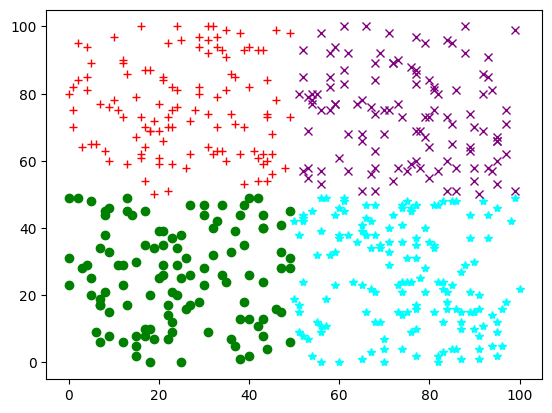

In [5]:
for i in range (len(label)):
  if label[i] == 0:
    plt.plot(x[i], y[i], c='green', marker = "o")
  elif label[i] == 1:
    plt.plot(x[i], y[i], c='cyan', marker = "*")
  elif label[i] == 2:
    plt.plot(x[i], y[i], c='red', marker = "+")
  else:
    plt.plot(x[i], y[i], c='purple', marker = "x")

plt.show()

Visualizasion of the dataset we have for all four classes

In [6]:
ft = list(zip(x,y))
np_ft = np.array(ft)
label_norm = np.array([norm(i) for i in label])
ft_train = np_ft[:450]
ft_test = np_ft[450:]


label_norm_train =  label_norm[:450]
label_norm_test = label_norm[450:]

Spliting the datas for training and testing purpose.
Here the first 450 data was taken for training purpose and rest 50 data was taken for testing purpose.


In [7]:
class n_net(object):

  def __init__(self, activation_type: str = "sigmoid"):
    input_neurons = 2
    h_l1_neurons = 7
    h_l2_neurons = 10
    h_l3_neurons = 10
    h_l4_neurons = 7
    output_neurons = 4
    self.lr = 0.05

    self.activation_type = activation_type

    self.W_in_to_H1 = np.random.randn(input_neurons,h_l1_neurons)

    self.W_H1_to_H2 = np.random.randn(h_l1_neurons,h_l2_neurons)

    self.W_H2_to_H3 = np.random.randn(h_l2_neurons,h_l3_neurons)

    self.W_H3_to_H4 = np.random.randn(h_l3_neurons,h_l4_neurons)

    self.W_H4_to_out = np.random.randn(h_l4_neurons,output_neurons)



  def activation(self, x, d = False):
        if self.activation_type == 'sigmoid':
            if d == True:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":
            if d == True:
                return 1 - (np.tanh(x))**2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if d == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "elu":
          alpha = 1
          if d == True:

            return np.where(x > 0, 1, alpha * np.exp(x))
          else:
            return np.where(x > 0, x, alpha * (np.exp(x) - 1))

  def feed_forward(self, val):
      h1_in = np.dot(val, self.W_in_to_H1)
      self.h1_out = self.activation(h1_in)

      h2_in = np.dot(self.h1_out, self.W_H1_to_H2)
      self.h2_out = self.activation(h2_in)

      h3_in = np.dot(self.h2_out, self.W_H2_to_H3)
      self.h3_out = self.activation(h3_in)

      h4_in = np.dot(self.h3_out, self.W_H3_to_H4)
      self.h4_out = self.activation(h4_in)

      out_in = np.dot(self.h4_out, self.W_H4_to_out)

      pred = self.activation(out_in)

      return pred

  def back_propagation(self, x, y, pred):
      y = np.array(y)
      pred = np.array(pred)

      out_theta = self.lr * (y-pred) * self.activation(pred, d = True)
      h4_theta = self.lr * (out_theta.dot(self.W_H4_to_out.T)) * self.activation(self.h4_out, d =True)
      h3_theta = self.lr * (h4_theta.dot(self.W_H3_to_H4.T)) * self.activation(self.h3_out, d =True)
      h2_theta = self.lr * (h3_theta.dot(self.W_H2_to_H3.T)) * self.activation(self.h2_out, d =True)
      h1_theta = self.lr * (h2_theta.dot(self.W_H1_to_H2.T)) * self.activation(self.h1_out, d =True)

      self.W_in_to_H1 += x.T.dot(h1_theta)
      self.W_H1_to_H2 += self.h1_out.T.dot(h2_theta)
      self.W_H2_to_H3 += self.h2_out.T.dot(h3_theta)
      self.W_H3_to_H4 += self.h3_out.T.dot(h4_theta)
      self.W_H4_to_out += self.h4_out.T.dot(out_theta)


  def train(self, x, y):
      self.back_propagation(x, y, self.feed_forward(x))




A class of neural network was created . It has a function of activation functions, a function of feed forward and a function of back propagation. We will be using one input layer of 2 neurons, 4 hidden layers containing 5, 7, 7, 5 neurons and one output layer containing 3 neurons.

Epoch: 0, error: 0.22350803366291289
Epoch: 10000, error: 0.10300462529087256
Epoch: 20000, error: 0.09845907623635501
Epoch: 30000, error: 0.07422115623614303
Epoch: 40000, error: 0.05123587923209844
Epoch: 50000, error: 0.03139175536370402
Epoch: 60000, error: 0.017395551936934074
Epoch: 70000, error: 0.007866376166876249
Epoch: 80000, error: 0.014697444709953461
Epoch: 90000, error: 0.008087766267417406
Epoch: 100000, error: 0.008618697404379065
Epoch: 110000, error: 0.0037336744113273678
Epoch: 120000, error: 0.004166088478302196
Epoch: 130000, error: 0.006748976355522414
Epoch: 140000, error: 0.010096690243697951
Epoch: 150000, error: 0.0037728604872586243
Epoch: 160000, error: 0.0021564664810385056
Epoch: 170000, error: 0.005984947538292074
Epoch: 180000, error: 0.010486843724126293
Epoch: 190000, error: 0.0028800077850427157


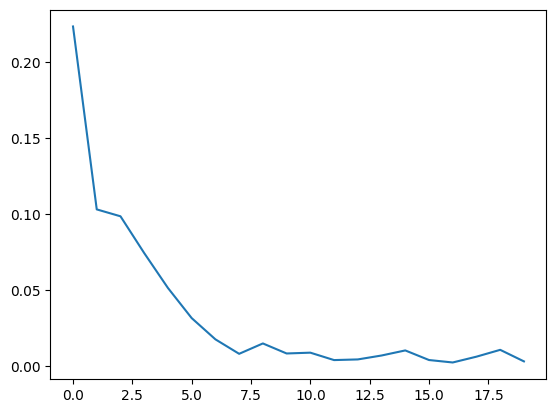

In [10]:
run = n_net(activation_type="sigmoid")

err_list= []

for i in range(200000):
  run.train(ft_train, label_norm_train)
  err = np.mean(np.square(label_norm_train-run.feed_forward(ft_train)))

  if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()
